In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plcdata/plcdata.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


2024-05-30 21:14:19.845741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 21:14:19.846021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 21:14:20.022383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:

df = pd.read_csv("/kaggle/input/plcdata/plcdata.csv")
df.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,Month,Day,Hour,Minute,Second,Millisecond,label
0,1011005,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,779,Normal
1,1137466,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,785,Normal
2,1010157,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,792,Normal
3,1021972,1001561,0,0,2063000,True,20:56.8,100.0,14.205319,2024,1,22,16,20,56,800,Normal
4,1032655,1001561,0,0,2063000,True,20:56.8,100.0,14.205319,2024,1,22,16,20,56,807,Normal


In [4]:
missing_values = df.isna()  # or df.isnull()

missing_count = missing_values.sum()

print(missing_count)

PLC Current cycle time         0
PLC The shortest cycle time    0
PLC The longest cycle time     0
PLC Min runtime                0
PLC Max runtime                0
PLC Running Status             0
Current_time                   0
Pump Speed                     0
SG lEVEL                       0
Year                           0
Month                          0
Day                            0
Hour                           0
Minute                         0
Second                         0
Millisecond                    0
label                          0
dtype: int64


In [5]:
print(df['PLC Running Status'].value_counts())

PLC Running Status
True     20680
False     4321
Name: count, dtype: int64


In [6]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'PLC Running Status' column
df['PLC Running Status'] = label_encoder.fit_transform(df['PLC Running Status'])


# Assuming combined_df is your combined dataframe containing both normal and abnormal data

# Rename the column 'OldColumnName' to 'NewColumnName'
df.rename(columns={'Label': 'label'}, inplace=True)

# Invert the labels
df['PLC Running Status'] = 1 - df['PLC Running Status']


# Display the modified dataframe
df.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,Month,Day,Hour,Minute,Second,Millisecond,label
0,1011005,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,1,22,16,20,56,779,Normal
1,1137466,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,1,22,16,20,56,785,Normal
2,1010157,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,1,22,16,20,56,792,Normal
3,1021972,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,1,22,16,20,56,800,Normal
4,1032655,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,1,22,16,20,56,807,Normal


In [7]:
print(df['PLC Running Status'].value_counts())

PLC Running Status
0    20680
1     4321
Name: count, dtype: int64


In [8]:
def features_ext(df):
    # Veriler kisitli oldugu icin kendimiz featurelar uretiyoruz.
    
    # Create a new column 'CycleTimeDifference' to store the differences in 'PLC Current cycle time'
    df['CycleTimeDifference'] = df['PLC Current cycle time'].diff()
    # Create a new column 'MaxRuntimeRatio' by dividing 'PLC Max runtime' by 'PLC Current cycle time'
    df['MaxRuntimeRatio'] = df['PLC Max runtime'] / df['PLC Current cycle time']

    df['longestimetimeRatio'] = df['PLC The longest cycle time'] / df['PLC Current cycle time']
    
  
    #df["sd_runtime_ratio"] = np.std(df["MaxRuntimeRatio"])

    # Ratio between Pump Speed and lEVEL
    #df["level_ratio"] = df["PLC Current cycle time"] / df["SG lEVEL"]

    # Ensure positive values for 'CycleTimeDifference' and 'MaxRuntimeRatio'
    df['CycleTimeDifference'] = df['CycleTimeDifference'].fillna(0).abs()  # Fill NaN (first row) with 0 and take absolute value
    df['MaxRuntimeRatio'] = df['MaxRuntimeRatio'].abs()  # Take absolute value for 'MaxRuntimeRatio'
    df['longestimetimeRatio'] = df['longestimetimeRatio'].abs()
    
    
    df['cycle_maxrun'] = df['CycleTimeDifference'] / df['MaxRuntimeRatio']
    # Rearrange columns to put 'label' column at the end
    df = df[[col for col in df if col != 'label'] + ['label']]
    # Map TRUE to 0 and FALSE to 1 in the 'PLC Running Status' column
  
    return df
df = features_ext(df)
df

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,Day,Hour,Minute,Second,Millisecond,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,label
0,1011005,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,22,16,20,56,779,0.0,2.040544,0.0,0.000000,Normal
1,1137466,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,22,16,20,56,785,126461.0,1.813681,0.0,69726.169571,Normal
2,1010157,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,22,16,20,56,792,127309.0,2.042257,0.0,62337.410331,Normal
3,1021972,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,...,22,16,20,56,800,11815.0,2.018646,0.0,5852.932225,Normal
4,1032655,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,...,22,16,20,56,807,10683.0,1.997763,0.0,5347.481030,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,1011168,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,22,16,23,45,872,1613.0,2.040215,0.0,790.602998,Normal
24997,1009898,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,22,16,23,45,878,1270.0,2.042781,0.0,621.701629,Normal
24998,1338167,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,22,16,23,45,884,328269.0,1.541661,0.0,212932.013050,Normal
24999,1292647,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,22,16,23,45,891,45520.0,1.595950,0.0,28522.196529,Normal


In [9]:
df.columns

Index(['PLC Current cycle time', 'PLC The shortest cycle time',
       'PLC The longest cycle time', 'PLC Min runtime', 'PLC Max runtime',
       'PLC Running Status', 'Current_time', 'Pump Speed', 'SG lEVEL', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond',
       'CycleTimeDifference', 'MaxRuntimeRatio', 'longestimetimeRatio',
       'cycle_maxrun', 'label'],
      dtype='object')

In [10]:
numeric_columns = ['PLC Current cycle time',
       'PLC Running Status', 'Pump Speed', 'SG lEVEL',
       'CycleTimeDifference', 'MaxRuntimeRatio', 
       'cycle_maxrun', 'label']

df2 = df[numeric_columns]

In [11]:
df.columns

Index(['PLC Current cycle time', 'PLC The shortest cycle time',
       'PLC The longest cycle time', 'PLC Min runtime', 'PLC Max runtime',
       'PLC Running Status', 'Current_time', 'Pump Speed', 'SG lEVEL', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond',
       'CycleTimeDifference', 'MaxRuntimeRatio', 'longestimetimeRatio',
       'cycle_maxrun', 'label'],
      dtype='object')

In [12]:
numeric_columns = ['CycleTimeDifference','Pump Speed',
       'PLC Running Status','MaxRuntimeRatio','cycle_maxrun']
def preprocessing(df, numeric_columns):
    # Map TRUE to 0 and FALSE to 1 in the 'PLC Running Status' column
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'PLC Running Status' column
    df['PLC Running Status'] = label_encoder.fit_transform(df['PLC Running Status'])
    # Copy of dataframe
    data = df.copy()
    # Apply label encoding
    #data['PLC Running Status'] = data['PLC Running Status'].apply(lambda x: 0 if x == 8 else 1)
    
    # Convert labels to numeric form using label encoding
    label_encoder = LabelEncoder()
    # Fit and transform the 'Label' column
    data['label'] = label_encoder.fit_transform(data['label'])

    # Invert the labels
    data['label'] = 1 - data['label']
    y = data['label']
     # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data = data[numeric_columns]
    
    dataframe = data.copy()
    
    # Convert the list to a NumPy array
    labels = np.array(y)
    # Get values from dataset
    raw_data = data.values
    # Get values not last column which is target column
    data = raw_data[:, :-1]
    # Normalization of data
    data = ((data - data.min()) / (data.max() - data.min())) * 5
    return dataframe, data, labels,y
#output of the function (dataframe)
dataframe,data,labels,y = preprocessing(df,numeric_columns)
dataframe    

,CycleTimeDifference,Pump Speed,PLC Running Status,MaxRuntimeRatio,cycle_maxrun
0,0.0,100.0,0,2.040544,0.000000
1,126461.0,100.0,0,1.813681,69726.169571
2,127309.0,100.0,0,2.042257,62337.410331
3,11815.0,100.0,0,2.018646,5852.932225
4,10683.0,100.0,0,1.997763,5347.481030
...,...,...,...,...,...
24996,1613.0,100.0,0,2.040215,790.602998
24997,1270.0,100.0,0,2.042781,621.701629
24998,328269.0,100.0,0,1.541661,212932.013050
24999,45520.0,100.0,0,1.595950,28522.196529


Epoch 1/50
895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7173 - loss: 0.6184 - val_accuracy: 0.7003 - val_loss: 0.5360
Epoch 2/50
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7944 - loss: 0.5091 - val_accuracy: 0.7685 - val_loss: 0.4531
Epoch 3/50
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8207 - loss: 0.4623 - val_accuracy: 0.8021 - val_loss: 0.4080
Epoch 4/50
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8405 - loss: 0.4421 - val_accuracy: 0.8320 - val_loss: 0.3737
Epoch 5/50
895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8532 - loss: 0.4094 - val_accuracy: 0.8293 - val_loss: 0.4012
Epoch 6/50
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8614 - loss: 0.3998 - val_accuracy: 0.8619 - val_loss: 0.3452
Epoch 7/50
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8730 - loss: 0.3759 - val_accuracy: 0.8643 - val_loss: 0.3413
Epoch 8/50
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8747 - loss: 0.3706 - val_accuracy: 0.

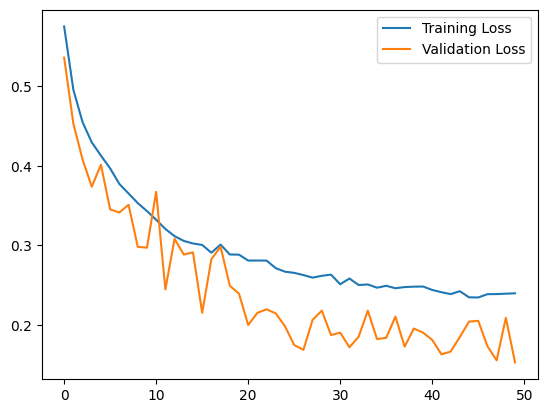

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9769 - loss: 0.1476


In [13]:
def neural_networks(data, labels):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
   

    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    
    # Smote dataseti daha dengeli hale getiren bir yontem.
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Build a simple neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),  # Replace num_features with the actual number of features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
    #plot training loss and validation loss
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    # Save the plot
    plt.savefig('loss_plot.png')  # Change the file extension and name as needed
    plt.show()
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model on the validation set
    nn_val_loss, nn_val_accuracy = model.evaluate(X_val, y_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    nn_predictions = y_pred_binary
    # Print evaluation metrics or use an existing function
    #print_stats(y_pred_binary, y_test)
    # Assuming your neural network model is defined in the neural_networks function
    # Train the neural network model and save it
   
    model.save("neural_network_model.h5")

    return nn_predictions,nn_val_loss, nn_val_accuracy,y_pred


# Example usage
nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


def machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    ## Apply SMOTE for oversampling on training data
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Calculate and print the sizes of the datasets
    size_X = len(X)
    size_X_train = len(X_train)
    size_X_val = len(X_val)
    size_X_test = len(X_test)

    print(f"Size of the original dataset (X): {size_X}")
    print(f"Size of the training set (X_train): {size_X_train}")
    print(f"Size of the validation set (X_val): {size_X_val}")
    print(f"Size of the test set (X_test): {size_X_test}")
    
    # Initialize machine learning models with adjusted training data
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
    svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    lr_model = LogisticRegression(C=1.0, solver='lbfgs')
    xgboost_model = XGBClassifier(objective='binary:logistic')

    # Train machine learning models with resampled data
    rf_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)
    gb_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    xgboost_model.fit(X_train, y_train)
    # ... (rest of your code remains the same)
            # Save each scikit-learn model
    dump(rf_model, 'random_forest_model.joblib')
    dump(svm_model, 'svm_model.joblib')
    dump(gb_model, 'gradient_boosting_model.joblib')
    dump(lr_model, 'logistic_regression_model.joblib')
    dump(xgboost_model, 'xgboost_model.joblib')
    
    # Predictions for machine learning models on validation and test sets
    rf_val_predictions = rf_model.predict(X_val)
    svm_val_predictions = svm_model.predict(X_val)
    gb_val_predictions = gb_model.predict(X_val)
    lr_val_predictions = lr_model.predict(X_val)
    xgboost_val_predictions = xgboost_model.predict(X_val)
    
    # Evaluate metrics for machine learning models on validation set
    rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
    svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
    gb_val_accuracy = accuracy_score(y_val, gb_val_predictions)
    lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
    xgboost_val_accuracy = accuracy_score(y_val, xgboost_val_predictions)
    
    # Predictions for machine learning models on test set
    rf_predictions = rf_model.predict(X_test)
    svm_predictions = svm_model.predict(X_test)
    gb_predictions = gb_model.predict(X_test)
    lr_predictions = lr_model.predict(X_test)
    xgboost_predictions = xgboost_model.predict(X_test)
    
    # Evaluate metrics for machine learning models on test set
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    gb_accuracy = accuracy_score(y_test, gb_predictions)
    lr_accuracy = accuracy_score(y_test, lr_predictions)
    xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)

    # Now, include the neural network model
    # Assuming neural_networks function is already defined and returns y_pred_binary
    #nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)
    
  
    # Evaluate metrics for the neural network model
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_precision = precision_score(y_test, nn_predictions)
    nn_recall = recall_score(y_test, nn_predictions)
    nn_f1 = f1_score(y_test, nn_predictions)
    nn_roc_auc = roc_auc_score(y_test, nn_predictions)
    
    
    # Print results for machine learning models
    print("\nMachine Learning Model Accuracy Scores on Validation Set:")
    print("-------------------------------------")
    print("-------------------------------------")
    print(f"Random Forest: {rf_val_accuracy:.5f}")
    print(f"SVM: {svm_val_accuracy:.5f}")
    print(f"Gradient Boosting: {gb_val_accuracy:.5f}")
    print(f"Logistic Regression: {lr_val_accuracy:.5f}")
    print(f"XGBoost: {xgboost_val_accuracy:.5f}")
    print(f"Neural Network (Validation): {nn_val_accuracy:.5f}\n")
    print("-------------------------------------")
    print("-------------------------------------")

    # Print results for machine learning models
    print("\nMachine Learning Model Accuracy Scores on Test Set:")
    print("-------------------------------------")
    print("-------------------------------------\n")
    print(f"Random Forest: {rf_accuracy:.5f}")
    print(f"SVM: {svm_accuracy:.5f}")
    print(f"Gradient Boosting: {gb_accuracy:.5f}")
    print(f"Logistic Regression: {lr_accuracy:.5f}")
    print(f"XGBoost: {xgboost_accuracy:.5f}")
    print(f"Neural Network: {nn_accuracy:.5f}\n")
    print("-------------------------------------")
    print("-------------------------------------\n")


    '''
    # Print results for the neural network model
    print("Neural Network Model Metrics:")
    print(f"Accuracy: {nn_accuracy}")
    print(f"Precision: {nn_precision}")
    print(f"Recall: {nn_recall}")
    print(f"F1-score: {nn_f1}")
    print(f"ROC AUC: {nn_roc_auc}")'''
    return X_train, X_temp, y_train, y_temp,X_val, X_test, y_val, y_test,rf_val_accuracy,svm_val_accuracy,gb_val_accuracy,lr_val_accuracy,xgboost_val_accuracy,rf_val_predictions,svm_val_predictions,gb_val_predictions,lr_val_predictions,xgboost_val_predictions,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions,nn_predictions,y_test,rf_accuracy,svm_accuracy,gb_accuracy,lr_accuracy,xgboost_accuracy,nn_accuracy
# Example usage
# machine_learning_data(data, labels)
#model score comperation
X_train, X_temp, y_train, y_temp,X_val, X_test, y_val, y_test,rf_val_accuracy,svm_val_accuracy,gb_val_accuracy,lr_val_accuracy,xgboost_val_accuracy,rf_val_predictions,svm_val_predictions,gb_val_predictions,lr_val_predictions,xgboost_val_predictions,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions,nn_predictions,y_test,rf_accuracy,svm_accuracy,gb_accuracy,lr_accuracy,xgboost_accuracy,nn_accuracy = machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred)

Size of the original dataset (X): 25001
Size of the training set (X_train): 28622
Size of the validation set (X_val): 3750
Size of the test set (X_test): 3751

Machine Learning Model Accuracy Scores on Validation Set:
-------------------------------------
-------------------------------------
Random Forest: 0.98560
SVM: 0.72213
Gradient Boosting: 0.98640
Logistic Regression: 0.57333
XGBoost: 0.98933
Neural Network (Validation): 0.97573

-------------------------------------
-------------------------------------

Machine Learning Model Accuracy Scores on Test Set:
-------------------------------------
-------------------------------------

Random Forest: 0.98480
SVM: 0.72434
Gradient Boosting: 0.98454
Logistic Regression: 0.57291
XGBoost: 0.98960
Neural Network: 0.97547

-------------------------------------
-------------------------------------



In [15]:
def results_machine_learning(y_test,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions):
    

    # Calculate evaluation metrics
    rf_precision = precision_score(y_test, rf_predictions)
    rf_recall = recall_score(y_test, rf_predictions)
    rf_f1 = f1_score(y_test, rf_predictions)
    rf_roc_auc = roc_auc_score(y_test, rf_predictions)

    svm_precision = precision_score(y_test, svm_predictions)
    svm_recall = recall_score(y_test, svm_predictions)
    svm_f1 = f1_score(y_test, svm_predictions)
    svm_roc_auc = roc_auc_score(y_test, svm_predictions)

    gb_precision = precision_score(y_test, gb_predictions)
    gb_recall = recall_score(y_test, gb_predictions)
    gb_f1 = f1_score(y_test, gb_predictions)
    gb_roc_auc = roc_auc_score(y_test, gb_predictions)

    lr_precision = precision_score(y_test, lr_predictions)
    lr_recall = recall_score(y_test, lr_predictions)
    lr_f1 = f1_score(y_test, lr_predictions)
    lr_roc_auc = roc_auc_score(y_test, lr_predictions)
    
    xgboost_precision = precision_score(y_test, xgboost_predictions)
    xgboost_recall = recall_score(y_test, xgboost_predictions)
    xgboost_f1 = f1_score(y_test, xgboost_predictions)
    xgboost_roc_auc = roc_auc_score(y_test, xgboost_predictions)
    
    # Evaluate metrics for the neural network model
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_precision = precision_score(y_test, nn_predictions)
    nn_recall = recall_score(y_test, nn_predictions)
    nn_f1 = f1_score(y_test, nn_predictions)
    nn_roc_auc = roc_auc_score(y_test, nn_predictions)
        # Create a dictionary to store the metrics
    results = {
        'Random Forest': {
            'Precision': rf_precision,
            'Recall': rf_recall,
            'F1-score': rf_f1,
            'ROC AUC': rf_roc_auc
        },
        'SVM': {
            'Precision': svm_precision,
            'Recall': svm_recall,
            'F1-score': svm_f1,
            'ROC AUC': svm_roc_auc
        },
        'Gradient Boosting': {
            'Precision': gb_precision,
            'Recall': gb_recall,
            'F1-score': gb_f1,
            'ROC AUC': gb_roc_auc
        },
        'Logistic Regression': {
            'Precision': lr_precision,
            'Recall': lr_recall,
            'F1-score': lr_f1,
            'ROC AUC': lr_roc_auc
        },
        'XGBoost': {
            'Precision': xgboost_precision,
            'Recall': xgboost_recall,
            'F1-score': xgboost_f1,
            'ROC AUC': xgboost_roc_auc
        },
        'Neural Network': {
            'Precision': nn_precision,
            'Recall': nn_recall,
            'F1-score': nn_f1,
            'ROC AUC': nn_roc_auc
        }
    }

    # Print the metrics for each model
    print("Random Forest Metrics:")
    print(f"Accuracy: {rf_accuracy:.5f}")
    print(f"Precision: {rf_precision:.5f}")
    print(f"Recall: {rf_recall:.5f}")
    print(f"F1-score: {rf_f1:.5f}")
    print(f"ROC AUC: {rf_roc_auc:.5f}")

    print("\nSVM Metrics:")
    print(f"Accuracy: {svm_accuracy:.5f}")
    print(f"Precision: {svm_precision:.5f}")
    print(f"Recall: {svm_recall:.5f}")
    print(f"F1-score: {svm_f1:.5f}")
    print(f"ROC AUC: {svm_roc_auc:.5f}")

    print("\nGradient Boosting Metrics:")
    print(f"Accuracy: {gb_accuracy:.5f}")
    print(f"Precision: {gb_precision:.5f}")
    print(f"Recall: {gb_recall:.5f}")
    print(f"F1-score: {gb_f1:.5f}")
    print(f"ROC AUC: {gb_roc_auc:.5f}")

    print("\nLogistic Regression Metrics:")
    print(f"Accuracy: {lr_accuracy:.5f}")
    print(f"Precision: {lr_precision:.5f}")
    print(f"Recall: {lr_recall:.5f}")
    print(f"F1-score: {lr_f1:.5f}")
    print(f"ROC AUC: {lr_roc_auc:.5f}")
    
    print("\nXGBoost Metrics:")
    print(f"Accuracy: {xgboost_accuracy:.5f}")
    print(f"Precision: {xgboost_precision:.5f}")
    print(f"Recall: {xgboost_recall:.5f}")
    print(f"F1-score: {xgboost_f1:.5f}")
    print(f"ROC AUC: {xgboost_roc_auc:.5f}")
    
    
    print("\nNeural Network Model Metrics:")
    print(f"Accuracy: {nn_accuracy:.5f}")
    print(f"Precision: {nn_precision:.5f}")
    print(f"Recall: {nn_recall:.5f}")
    print(f"F1-score: {nn_f1:.5f}")
    print(f"ROC AUC: {nn_roc_auc:.5f}")
    return results,rf_precision,rf_recall,rf_f1,rf_roc_auc,svm_precision,svm_recall,svm_f1,svm_roc_auc,gb_precision,gb_recall,gb_f1,gb_roc_auc,lr_precision,lr_recall,lr_f1,lr_roc_auc,xgboost_precision,xgboost_recall,xgboost_f1,xgboost_roc_auc,nn_accuracy,nn_precision,nn_recall,nn_f1,nn_roc_auc 
results,rf_precision,rf_recall,rf_f1,rf_roc_auc,svm_precision,svm_recall,svm_f1,svm_roc_auc,gb_precision,gb_recall,gb_f1,gb_roc_auc,lr_precision,lr_recall,lr_f1,lr_roc_auc,xgboost_precision,xgboost_recall,xgboost_f1,xgboost_roc_auc,nn_accuracy,nn_precision,nn_recall,nn_f1,nn_roc_auc  =results_machine_learning(y_test,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions)

Random Forest Metrics:
Accuracy: 0.98480
Precision: 1.00000
Recall: 0.91618
F1-score: 0.95625
ROC AUC: 0.95809

SVM Metrics:
Accuracy: 0.72434
Precision: 0.39114
Recall: 0.93529
F1-score: 0.55160
ROC AUC: 0.80646

Gradient Boosting Metrics:
Accuracy: 0.98454
Precision: 1.00000
Recall: 0.91471
F1-score: 0.95545
ROC AUC: 0.95735

Logistic Regression Metrics:
Accuracy: 0.57291
Precision: 0.29290
Recall: 0.95882
F1-score: 0.44873
ROC AUC: 0.72314

XGBoost Metrics:
Accuracy: 0.98960
Precision: 0.98782
Recall: 0.95441
F1-score: 0.97083
ROC AUC: 0.97590

Neural Network Model Metrics:
Accuracy: 0.97547
Precision: 0.95652
Recall: 0.90588
F1-score: 0.93051
ROC AUC: 0.94838


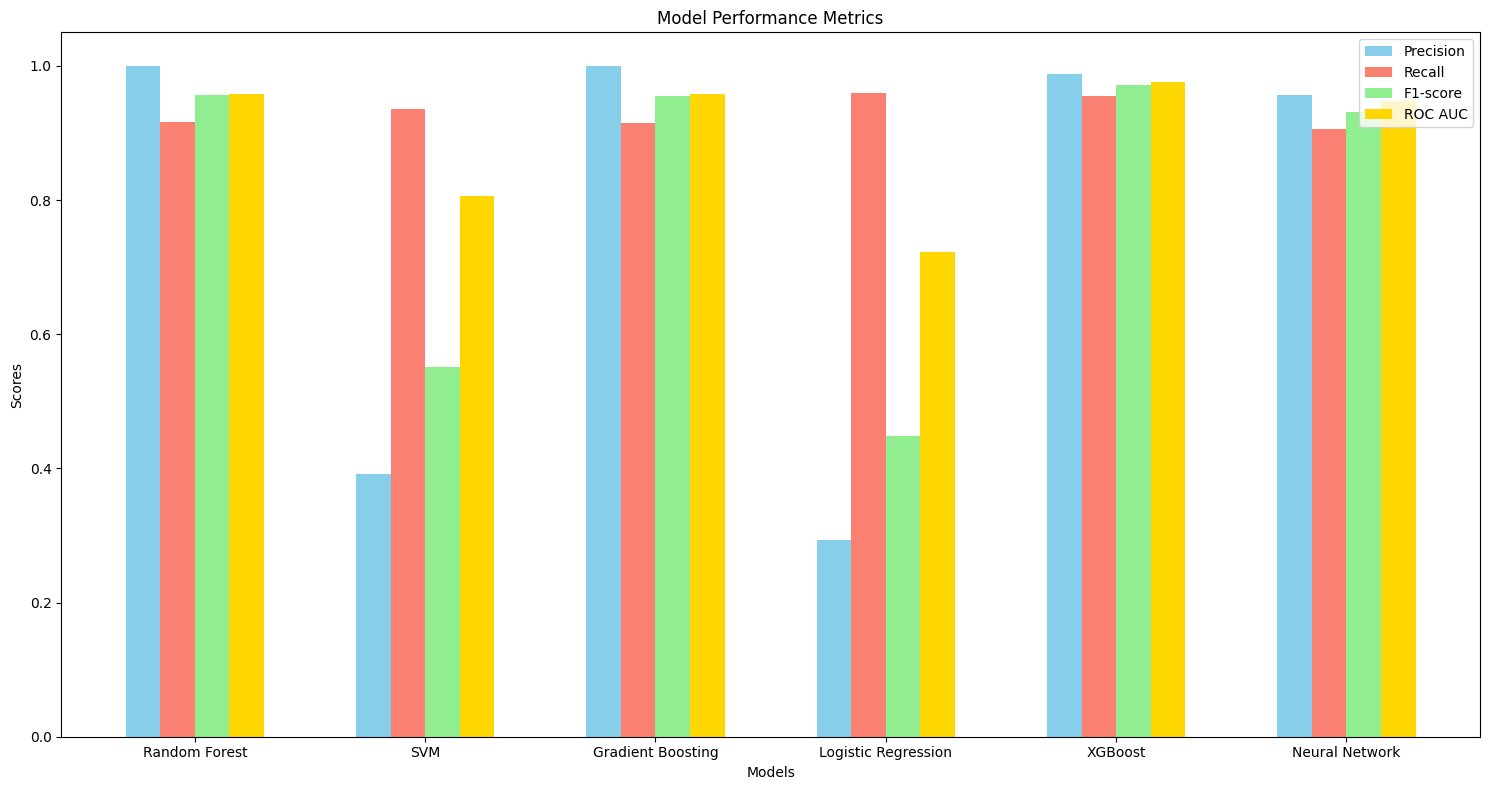

In [16]:
# Extract model names and metrics
model_names = list(results.keys())
metrics = list(results[model_names[0]].keys())

# Arrange the data for plotting
metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}
x = np.arange(len(model_names))
bar_width = 0.15  # Width of the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  # Colors for different metrics

# Plot grouped bars for each metric
plt.figure(figsize=(15, 8))

for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.bar(x + (i - 1.5) * bar_width, metric_values[metric], width=bar_width, label=metric, color=color)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.xticks(x, model_names)
plt.legend(loc='upper right')
plt.tight_layout()
output_path = '/kaggle/working/model_performance_metrics.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

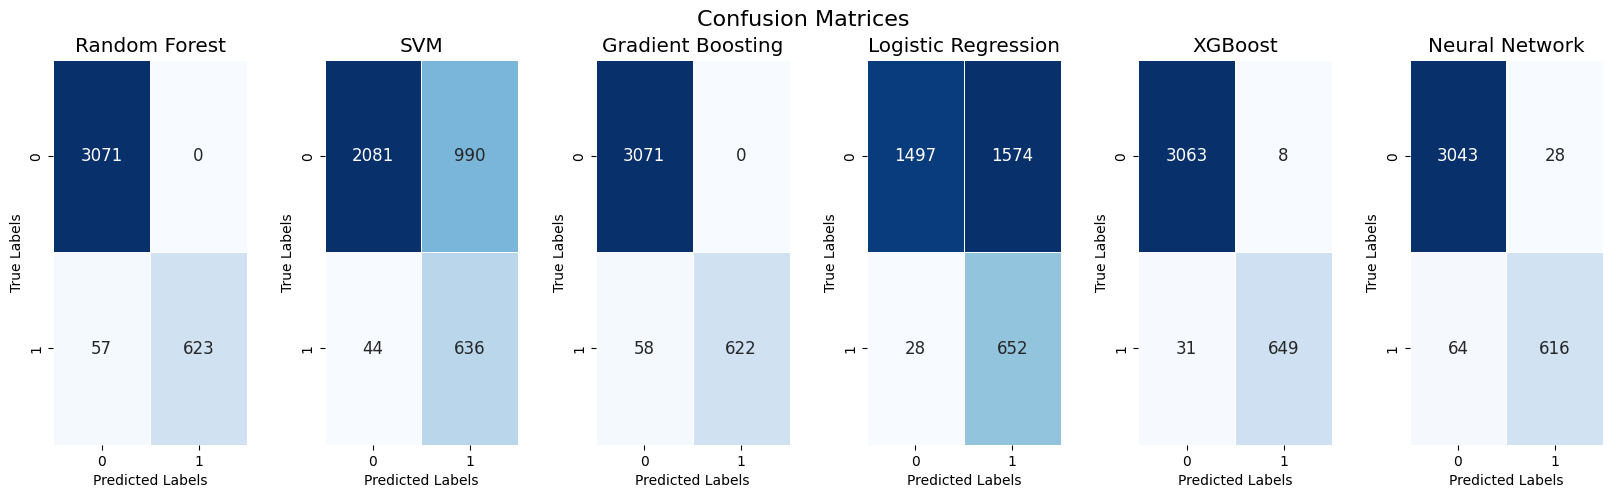

In [17]:
def plot_conf_matrix(y_test, rf_predictions, svm_predictions, gb_predictions, lr_predictions,xgboost_predictions,nn_predictions):
    # Create confusion matrices for each model
    rf_confusion = confusion_matrix(y_test, rf_predictions)
    svm_confusion = confusion_matrix(y_test, svm_predictions)
    gb_confusion = confusion_matrix(y_test, gb_predictions)
    lr_confusion = confusion_matrix(y_test, lr_predictions)
    xgboost_confusion = confusion_matrix(y_test, xgboost_predictions)
    nn_confusion = confusion_matrix(y_test, nn_predictions)

    # Create subplots for the confusion matrices
    fig, axs = plt.subplots(1, 6, figsize=(20, 5))
    fig.suptitle('Confusion Matrices', fontsize=16)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Plot Random Forest Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[0])
    axs[0].set_title("Random Forest")
    axs[0].set_xlabel('Predicted Labels')
    axs[0].set_ylabel('True Labels')

    # Plot SVM Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[1])
    axs[1].set_title("SVM")
    axs[1].set_xlabel('Predicted Labels')
    axs[1].set_ylabel('True Labels')

    # Plot Gradient Boosting Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(gb_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[2])
    axs[2].set_title("Gradient Boosting")
    axs[2].set_xlabel('Predicted Labels')
    axs[2].set_ylabel('True Labels')

    # Plot Logistic Regression Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[3])
    axs[3].set_title("Logistic Regression")
    axs[3].set_xlabel('Predicted Labels')
    axs[3].set_ylabel('True Labels')
    
    # Plot Neural Network Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(xgboost_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[4])
    axs[4].set_title("XGBoost")
    axs[4].set_xlabel('Predicted Labels')
    axs[4].set_ylabel('True Labels')

    # Plot Neural Network Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(nn_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[5])
    axs[5].set_title("Neural Network")
    axs[5].set_xlabel('Predicted Labels')
    axs[5].set_ylabel('True Labels')
    output_path = '/kaggle/working/confusion_matrices.png'
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

# Example usage
plot_conf_matrix(y_test, rf_predictions, svm_predictions, gb_predictions, lr_predictions,xgboost_predictions,nn_predictions)
